In [1]:
import csv
import os
import numpy as np
from utils import *

# data_dict = ['file type', 'patient name', 'original slice', 'mxmn slice', 'mxmn shape', 'mxmn type']
# data_csv = open(os.path.join('./data_preview/total.csv'), 'w', newline='', encoding='utf-8')
# csv_writer = csv.writer(data_csv)
# csv_writer.writerow(data_dict)

root = '/data1/Dental/MCS-CT 영상 데이터-19년7월15일-김정웅/'
root_dict = 'CBCT-Mcs-19-7-1/완료/'

root_paths =os.path.join(root, root_dict)

pat_list = os.listdir(root_paths)

for pat in pat_list:
    pat_paths = os.path.join(root_paths, pat)

    ori_paths = os.path.join(pat_paths, 'original')
    mxmn_paths = os.path.join(pat_paths, 'Mx Mn') 
    print(mxmn_paths)
    ori_list = [os.path.join(ori_paths, i) for i in sorted(os.listdir(ori_paths))]
    mxmn_list = [os.path.join(mxmn_paths, i) for i in sorted(os.listdir(mxmn_paths))]

#         if num == 1 : f_type = 'CBCT-MCS'
#         if num == 2 : f_type = 'COM-MCS'
#         if num == 3 : f_type = 'MCS 모음'

    if len(mxmn_list):
        ori = load_3d_vol(ori_list, 'gray')
        mm_ = load_3d_vol(mxmn_list, 'rgb')
        mask = make_mask(mm_)
#             csv_writer.writerow([f_type, pat, len(ori_list), len(mxmn_list), mm_.shape, mm_.dtype])

/data1/Dental/MCS-CT 영상 데이터-19년7월15일-김정웅/CBCT-Mcs-19-7-1/완료/김춘구 1/Mx Mn
/data1/Dental/MCS-CT 영상 데이터-19년7월15일-김정웅/CBCT-Mcs-19-7-1/완료/천언성 1/Mx Mn
/data1/Dental/MCS-CT 영상 데이터-19년7월15일-김정웅/CBCT-Mcs-19-7-1/완료/권세환 1/Mx Mn
/data1/Dental/MCS-CT 영상 데이터-19년7월15일-김정웅/CBCT-Mcs-19-7-1/완료/김은식 1/Mx Mn
/data1/Dental/MCS-CT 영상 데이터-19년7월15일-김정웅/CBCT-Mcs-19-7-1/완료/정새롬 1/Mx Mn
/data1/Dental/MCS-CT 영상 데이터-19년7월15일-김정웅/CBCT-Mcs-19-7-1/완료/이재원 1/Mx Mn
/data1/Dental/MCS-CT 영상 데이터-19년7월15일-김정웅/CBCT-Mcs-19-7-1/완료/최수정 1/Mx Mn
/data1/Dental/MCS-CT 영상 데이터-19년7월15일-김정웅/CBCT-Mcs-19-7-1/완료/최대린 1/Mx Mn
/data1/Dental/MCS-CT 영상 데이터-19년7월15일-김정웅/CBCT-Mcs-19-7-1/완료/김태현 1/Mx Mn
/data1/Dental/MCS-CT 영상 데이터-19년7월15일-김정웅/CBCT-Mcs-19-7-1/완료/양인용 1/Mx Mn
/data1/Dental/MCS-CT 영상 데이터-19년7월15일-김정웅/CBCT-Mcs-19-7-1/완료/김영재 1/Mx Mn
/data1/Dental/MCS-CT 영상 데이터-19년7월15일-김정웅/CBCT-Mcs-19-7-1/완료/김동현 1/Mx Mn
/data1/Dental/MCS-CT 영상 데이터-19년7월15일-김정웅/CBCT-Mcs-19-7-1/완료/김현욱 1/Mx Mn
/data1/Dental/MCS-CT 영상 데이터-19년7월15일-김정웅/CBCT-Mcs-19-7-1/완료/백미라 

In [6]:
s, c, a, _ = mask.shape
print(s, c, a, _)

256 512 512 3


In [38]:
patch_size = 48
x_list = []
y_list = []
for j in range(0, c-patch_size+1, patch_size//2):
    for k in range(0, a-patch_size+1, patch_size//2):
        tmp = mask[100, j:j+patch_size, k:k+patch_size][..., 0]
        if tmp.shape != (patch_size, patch_size) : continue
        val = tmp.sum()
        if val/(patch_size**2)>0.5 : continue
        x_list.append(ori[100, j:j+patch_size, k:k+patch_size])
        y_list.append(mask[100, j:j+patch_size, k:k+patch_size])
        

In [39]:
x = np.array(x_list)
y = np.array(y_list)

print(x.shape)
print(y.shape)

(1, 48, 48)
(1, 48, 48, 3)


IndexError: index 85 is out of bounds for axis 0 with size 1

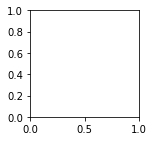

In [26]:
import matplotlib.pyplot as plt

idx = 100
plt.figure(figsize=(9,9))
plt.subplot(4,4,1)
plt.imshow(x[idx-15, ...], cmap='gray')
plt.axis('off')
plt.subplot(4,4,2)
plt.imshow(x[idx-14, ...], cmap='gray')
plt.axis('off')
plt.subplot(4,4,3)
plt.imshow(x[idx-13, ...], cmap='gray')
plt.axis('off')
plt.subplot(4,4,4)
plt.imshow(x[idx-12, ...], cmap='gray')
plt.axis('off')
plt.subplot(4,4,5)
plt.imshow(x[idx+5, ...], cmap='gray')
plt.axis('off')
plt.subplot(4,4,6)
plt.imshow(x[idx+6, ...], cmap='gray')
plt.axis('off')
plt.subplot(4,4,7)
plt.imshow(x[idx+7, ...], cmap='gray')
plt.axis('off')
plt.subplot(4,4,8)
plt.imshow(x[idx+8, ...], cmap='gray')
plt.axis('off')
plt.subplot(4,4,9)
plt.imshow(x[idx+25, ...], cmap='gray')
plt.axis('off')
plt.subplot(4,4,10)
plt.imshow(x[idx+26, ...], cmap='gray')
plt.axis('off')
plt.subplot(4,4,11)
plt.imshow(x[idx+27, ...], cmap='gray')
plt.axis('off')
plt.subplot(4,4,12)
plt.imshow(x[idx+28, ...], cmap='gray')
plt.axis('off')
plt.subplot(4,4,13)
plt.imshow(x[idx+45, ...], cmap='gray')
plt.axis('off')
plt.subplot(4,4,14)
plt.imshow(x[idx+46, ...], cmap='gray')
plt.axis('off')
plt.subplot(4,4,15)
plt.imshow(x[idx+47, ...], cmap='gray')
plt.axis('off')
plt.subplot(4,4,16)
plt.imshow(x[idx+48, ...], cmap='gray')
plt.axis('off')
plt.show()

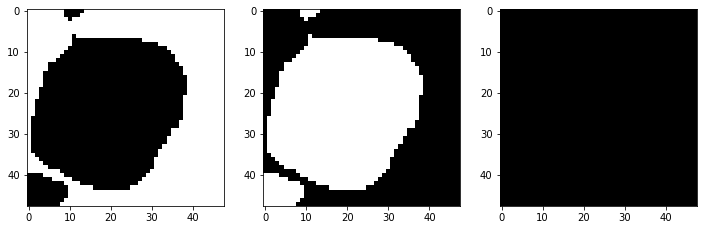

In [46]:
import matplotlib.pyplot as plt

idx = 100
plt.figure(figsize=(12,9))
plt.subplot(131)
plt.imshow(y[0, ...,0], cmap='gray')

plt.subplot(132)
plt.imshow(y[0, ...,1], cmap='gray')

plt.subplot(133)
plt.imshow(y[0, ...,2], cmap='gray')

plt.show()

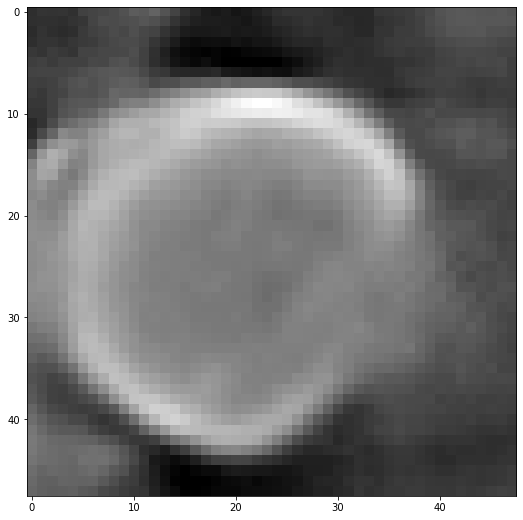

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,9))
plt.imshow(x[0, ...], cmap='gray')